# ИУ5-62Б Бабин А.С.
## Рубежный контроль №2 (вариант 2)

### Задание
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.
### Набор данных
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

### Методы
- метод опорных векторов
- случайный лес

## Решение

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [3]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [11]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [24]:
data['target'].value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
Name: target, dtype: float64

In [5]:
print('Количество пропущенных значений')
data.isnull().sum()

Количество пропущенных значений


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

**Пропуски в данных не обнаружены.**
<br></br>

## Выбор метрик и подготовка данных

Так как выполняется задача небинарной классификации и в тестовой выборке возможен дисбаланс классов, были выбраны следующие метрики:
- precision;
- recall;
- f1-score.

Всем метрикам был задан уровень детализации `average='weighted'`.

In [104]:
def print_metrics(y_test, y_pred):
    rep = classification_report(y_test, y_pred, output_dict=True)
    print("weighted precision:", rep['weighted avg']['precision'])
    print("weighted recall:", rep['weighted avg']['recall'])
    print("weighted f1-score:", rep['weighted avg']['f1-score'])
    plt.figure(figsize=(4, 3))
    plt.title('Матрица ошибок')
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues");

In [112]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['target'], axis=1), data['target'], test_size=0.5, random_state=17)

## SVC
### Базовая модель

weighted precision: 0.9602828282828282
weighted recall: 0.96
weighted f1-score: 0.9598945386064031


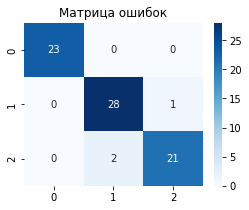

In [143]:
svm_model = SVC()
svm_model.fit(x_train_scaled, y_train)
y_pred_svm = svm_model.predict(x_test_scaled)
print_metrics(y_test, y_pred_svm)

### Масштабирование данных

In [144]:
scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)
x_train_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,7.500000e+01,7.500000e+01,7.500000e+01,7.500000e+01
mean,1.169435e-16,-7.460699e-16,-6.069219e-17,6.365279e-17
std,1.006734e+00,1.006734e+00,1.006734e+00,1.006734e+00
min,-1.710367e+00,-2.351670e+00,-1.469543e+00,-1.377354e+00
25%,-8.901782e-01,-5.655914e-01,-1.200725e+00,-1.188848e+00
50%,-6.998944e-02,-1.190719e-01,3.584252e-01,2.563688e-01
75%,5.861615e-01,5.507074e-01,8.154174e-01,8.847238e-01
max,2.226539e+00,3.006565e+00,1.702520e+00,1.513079e+00


### Подбор гиперпараметров

In [145]:
params = {'C': np.concatenate([np.arange(0.1, 2, 0.03), np.arange(2, 20, 1)])}
grid_cv = GridSearchCV(estimator=svm_model, param_grid=params, cv=10, n_jobs=-1, scoring='f1_macro')
grid_cv.fit(x_train_scaled, y_train)
print(grid_cv.best_params_)

{'C': 4.0}


### Лучшая модель

weighted precision: 0.9750537634408601
weighted recall: 0.9733333333333334
weighted f1-score: 0.9731717171717171


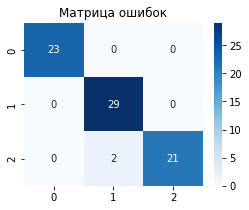

In [146]:
best_svm_model = grid_cv.best_estimator_
best_svm_model.fit(x_train_scaled, y_train)
y_pred_svm = best_svm_model.predict(x_test_scaled)
print_metrics(y_test, y_pred_svm)

## RandomForestClassifier

### Базовая модель

weighted precision: 0.9466666666666667
weighted recall: 0.9466666666666667
weighted f1-score: 0.9466666666666667


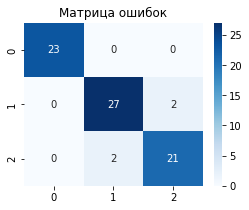

In [147]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
y_pred_rfc = rfc_model.predict(x_test)
print_metrics(y_test, y_pred_rfc)

### Подбор гиперпараметров

In [133]:
params = {'n_estimators': [5, 10, 50, 100], 'max_features': [2, 3, 4], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3, 4, 5]}
grid_cv = GridSearchCV(estimator=rfc_model, param_grid=params, cv=10, n_jobs=-1, scoring='f1_weighted')
grid_cv.fit(x_train, y_train)
print(grid_cv.best_params_)

{'criterion': 'gini', 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 5}


### Лучшая модель

weighted precision: 0.9754666666666666
weighted recall: 0.9733333333333334
weighted f1-score: 0.9734126984126984


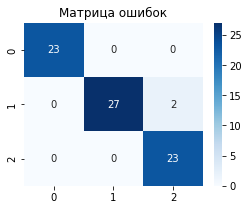

In [148]:
best_rfc_model = grid_cv.best_estimator_
best_rfc_model.fit(x_train, y_train)
y_pred_rfc = best_rfc_model.predict(x_test)
print_metrics(y_test, y_pred_rfc)

## Сравнение результатов

SVC result

weighted precision: 0.9750537634408601
weighted recall: 0.9733333333333334
weighted f1-score: 0.9731717171717171


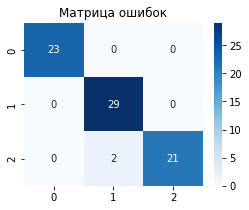

In [149]:
print("SVC result\n")
print_metrics(y_test, y_pred_svm)

RandomForestClassifier result

weighted precision: 0.9754666666666666
weighted recall: 0.9733333333333334
weighted f1-score: 0.9734126984126984


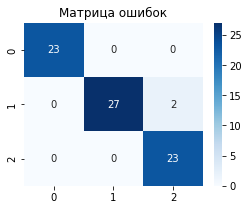

In [150]:
print("RandomForestClassifier result\n")
print_metrics(y_test, y_pred_rfc)

## Вывод

Модели с подобранными гиперпараметрами оказались лучше базовых моделей. Обе конечные модели показали очень высокую точность прогноза, что объясняется спецификой используемого "игрушечного" датасета. Из матриц ошибок видим, что обе модели совершили по 2 неверных прогноза из 75, однако ошибки у них разные. Метрики показывают, что качества рассматриваемых моделей практически одинаковое: отличия начинаются лишь в 4 знаке после запятой. 